In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [2]:
#Read in cleased data file
file_5 = "Resources/all.csv"
when_df = pd.read_csv(file_5)

when_df.head()

C:\Users\Gary Whitney\anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Accident_Index,1st_Road_Class,Accident_Severity,Year,Date,Day_of_Week,Latitude,Light_Conditions,Local_Authority_(District),...,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
0,478587,201001BS70003,B,Slight,2010,2010-01-11,Monday,51.484087,Daylight,Kensington and Chelsea,...,Commuting to/from work,Mid Junction - on roundabout or on main road,CITROEN,BERLINGO FIRST 600,Petrol,Female,No tow/articulation,Turning right,Van / Goods 3.5 tonnes mgw or under,No
1,478588,201001BS70004,A,Slight,2010,2010-01-11,Monday,51.509212,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,RENAULT,SCENIC DYN DCI 130,Heavy oil,Male,No tow/articulation,Going ahead other,Car,No
2,478589,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA SVE CVT,Petrol,Female,No tow/articulation,Going ahead right-hand bend,Car,No
3,478590,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,MERCEDES,A140 ELEGANCE,Petrol,Female,No tow/articulation,Going ahead other,Car,No
4,478591,201001BS70008,A,Slight,2010,2010-01-04,Monday,51.484361,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,VAUXHALL,ZAFIRA ELEGANCE DTI,Heavy oil,Male,No tow/articulation,Turning right,Taxi/Private hire car,No


<IPython.core.display.Javascript object>


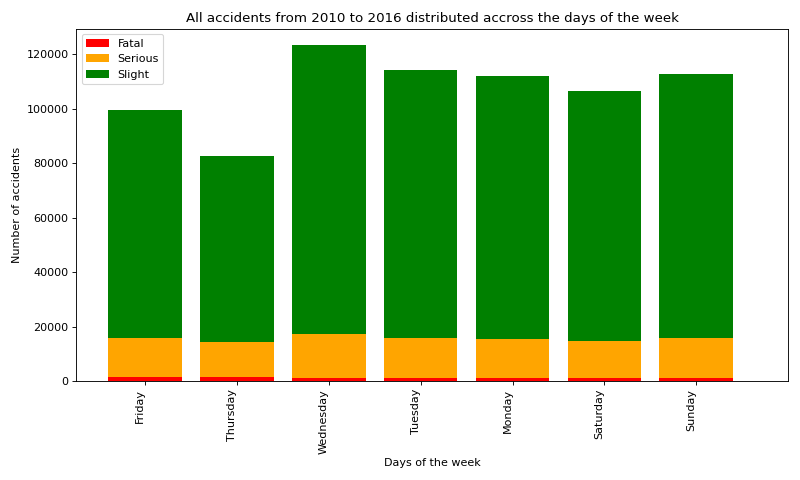

In [6]:
# create a stacked plot and save to Images folder
accident_sev_dow = when_df.groupby(['Day_of_Week','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_dow.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Day_of_Week']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Days of the week vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Days of the week")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper left")
plt.savefig("Images/Accident_distribution_Day_of_week.png", bbox_inches = "tight")
plt.show()

In [7]:
# create an array of Days of the week
when_df['Day_of_Week'].unique()

array(['Monday', 'Saturday', 'Tuesday', 'Thursday', 'Wednesday', 'Sunday',
       'Friday'], dtype=object)

In [8]:
# create a series to count the number of accidents
acc_count = when_df['Day_of_Week'].value_counts()
acc_count

Friday       178273
Thursday     163666
Wednesday    161182
Tuesday      160188
Monday       152613
Saturday     143125
Sunday       118606
Name: Day_of_Week, dtype: int64

In [9]:
# view the array of days of the week (x axis) 
acc_count.index.values

array(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Saturday',
       'Sunday'], dtype=object)

In [10]:
# view the array for timepoints (y axis) 
acc_count.values

array([178273, 163666, 161182, 160188, 152613, 143125, 118606],
      dtype=int64)

In [11]:
#  Generate a bar plot showing how all accidents from 2010 to 2016 are distributed accross the days of the week
Day_of_Week = acc_count.index.values
No_of_accidents = acc_count.values
x_axis = np.arange(len(No_of_accidents))

<IPython.core.display.Javascript object>


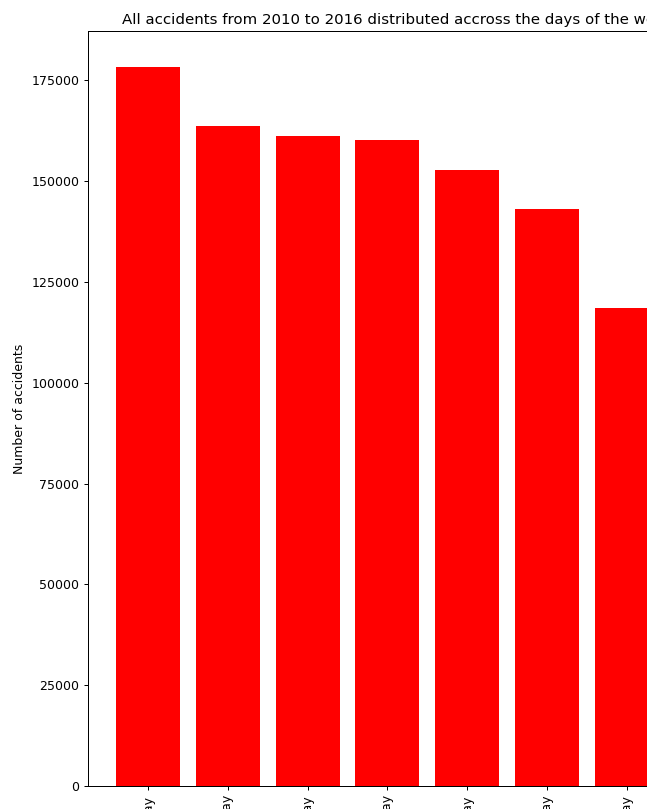

<BarContainer object of 7 artists>

In [39]:
# plot the bar chart 
plt.figure(figsize=(8,10))
plt.bar(x_axis, No_of_accidents, color="r", align="center")

In [12]:
# create a variable for the Days on the x axis and set the rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Day_of_Week, rotation="vertical")

([<matplotlib.axis.XTick at 0x1f182e04c40>,
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Thursday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

In [13]:
# set the limit of the x axis to position the bars within the chart
plt.xlim(-0.75, len(x_axis))

(-0.75, 7.0)

In [14]:
# add the titles
plt.title("All accidents from 2010 to 2016 distributed accross the days of the week")
plt.xlabel("Days of the week")
plt.ylabel("Number of accidents")

Text(45.652779085768586, 0.5, 'Number of accidents')

In [16]:
# Generate a bar plot showing the total number of accidents on each day of the week using Pyplot and save it to the Images folder
plt.tight_layout()
plt.savefig("Images/Accident_distribution_Days")

In [17]:
#  Group all accidents by gender to create a dataframe to use to plot the distribution

group_by_gender = when_df.groupby(["Accident_Index","Sex_of_Driver"])
gender_df = pd.DataFrame(group_by_gender.size())

# Create the dataframe with total count of accidents by gender
gender = pd.DataFrame(gender_df.groupby(["Sex_of_Driver"]).count())
gender.columns = ["QTY"]

# caclcualte percentage of accidents by gender
gender["%"] = (100*(gender["QTY"]/gender["QTY"].sum()))

# create gender data frame
gender

,QTY,%
Sex_of_Driver,,
Data missing or out of range,24,0.002692
Female,321393,36.043738
Male,543098,60.907618
Not known,27160,3.045953


<IPython.core.display.Javascript object>


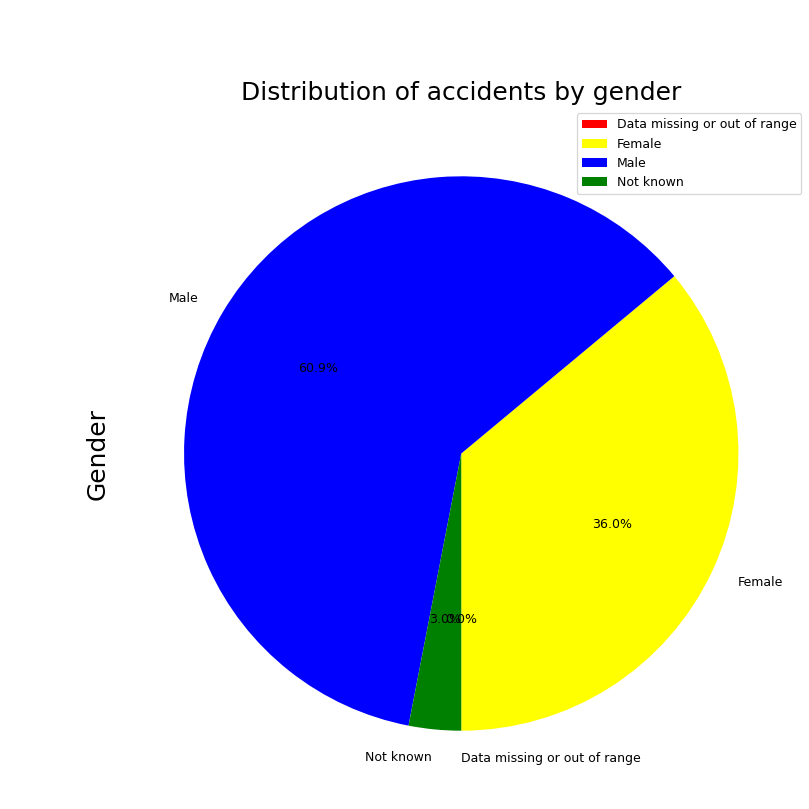

In [45]:
# Generate a pie plot showing the distribution of accidents accros genders

colors = ['red', 'yellow','blue','green']

plot = gender.plot.pie(y='QTY',figsize=(10,10), colors = colors, startangle=270, shadow = False, autopct="%1.1f%%")

plt.title('Distribution of accidents by gender',fontsize = 20)
plt.ylabel('Gender',fontsize = 20)

plt.savefig("Images/Accident_distribution_gender.png", bbox_inches = "tight")
plt.show()

In [18]:
# create an array accident severity
when_df['Accident_Severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [19]:
# create a series to count the severity of all accidents
acc_count_1 = when_df['Accident_Severity'].value_counts()
acc_count_1

Slight     929162
Serious    136245
Fatal       12246
Name: Accident_Severity, dtype: int64

<IPython.core.display.Javascript object>


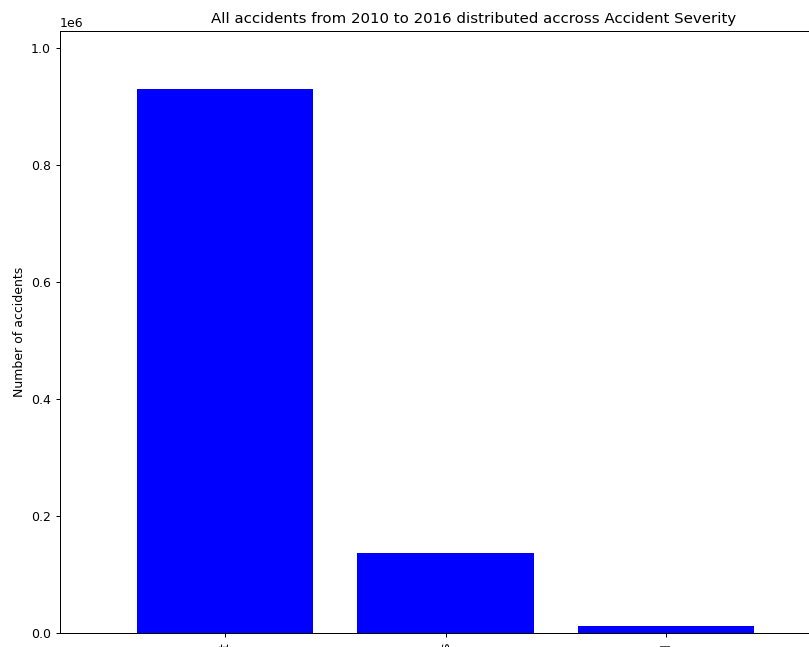

In [48]:
#  Generate a bar plot showing how all accidents from 2010 to 2016 are distributed accross Accident Severity
Accident_Severity = acc_count_1.index.values
No_of_accidents = acc_count_1.values
x_axis = np.arange(len(No_of_accidents))
# plot the bar chart 
plt.figure(figsize=(10,8))
plt.bar(x_axis, No_of_accidents, color="b", align="center")
# create a variable for Accident_Severity on the x axis and set the rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Accident_Severity, rotation="vertical")
# set the limit of the x axis to position the bars within the chart
plt.xlim(-0.75, len(x_axis))
# set the limit of the y axis to position the top of the bars within the chart
plt.ylim(0, max(acc_count_1)+100000)
# add the titles
plt.title("All accidents from 2010 to 2016 distributed accross Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Number of accidents")
# Generate a bar plot
plt.tight_layout()
plt.savefig("Images/Accident_distribution_Severity")

In [20]:
# reduce to just the data that i want to report on and rename columns
df_1 = when_df[['Accident_Index', 'Year', 'Date','Day_of_Week' ,'Time','Accident_Severity','Number_of_Casualties','Junction_Location','Sex_of_Driver']]
df_1.columns = ['Index', 'Year', 'Date', 'Day','Time','Severity','Casualties','Location','Gender']
df_1

,Index,Year,Date,Day,Time,Severity,Casualties,Location,Gender
0,201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female
1,201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male
2,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female
3,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female
4,201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male
...,...,...,...,...,...,...,...,...,...
1077648,2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Female
1077649,2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Not known
1077650,2016984131116,2016,2016-11-01,Tuesday,16:45,Slight,2,Mid Junction - on roundabout or on main road,Female
1077651,2016984131316,2016,2016-10-29,Saturday,20:00,Slight,3,Not at or within 20 metres of junction,Male


In [50]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077653 entries, 0 to 1077652
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Index       1077653 non-null  object
 1   Year        1077653 non-null  int64 
 2   Date        1077653 non-null  object
 3   Day         1077653 non-null  object
 4   Time        1077653 non-null  object
 5   Severity    1077653 non-null  object
 6   Casualties  1077653 non-null  int64 
 7   Location    1077653 non-null  object
 8   Gender      1077653 non-null  object
dtypes: int64(2), object(7)
memory usage: 74.0+ MB


In [21]:
#Add a column to place the hour in for binning
df_1['Time_f'] = ''
df_1

<ipython-input-21-1a839d16d948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time_f'] = ''


,Index,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f
0,201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,
1,201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,
2,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,
3,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,
4,201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,
...,...,...,...,...,...,...,...,...,...,...
1077648,2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Female,
1077649,2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Not known,
1077650,2016984131116,2016,2016-11-01,Tuesday,16:45,Slight,2,Mid Junction - on roundabout or on main road,Female,
1077651,2016984131316,2016,2016-10-29,Saturday,20:00,Slight,3,Not at or within 20 metres of junction,Male,


In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077653 entries, 0 to 1077652
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Index       1077653 non-null  object
 1   Year        1077653 non-null  int64 
 2   Date        1077653 non-null  object
 3   Day         1077653 non-null  object
 4   Time        1077653 non-null  object
 5   Severity    1077653 non-null  object
 6   Casualties  1077653 non-null  int64 
 7   Location    1077653 non-null  object
 8   Gender      1077653 non-null  object
 9   Time_f      1077653 non-null  object
dtypes: int64(2), object(8)
memory usage: 82.2+ MB


In [23]:
#Add a column to place the hour in for binning
df_1['Time_f'] = ''
df_1

<ipython-input-23-1a839d16d948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time_f'] = ''


,Index,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f
0,201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,
1,201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,
2,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,
3,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,
4,201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,
...,...,...,...,...,...,...,...,...,...,...
1077648,2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Female,
1077649,2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Not known,
1077650,2016984131116,2016,2016-11-01,Tuesday,16:45,Slight,2,Mid Junction - on roundabout or on main road,Female,
1077651,2016984131316,2016,2016-10-29,Saturday,20:00,Slight,3,Not at or within 20 metres of junction,Male,


In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077653 entries, 0 to 1077652
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Index       1077653 non-null  object
 1   Year        1077653 non-null  int64 
 2   Date        1077653 non-null  object
 3   Day         1077653 non-null  object
 4   Time        1077653 non-null  object
 5   Severity    1077653 non-null  object
 6   Casualties  1077653 non-null  int64 
 7   Location    1077653 non-null  object
 8   Gender      1077653 non-null  object
 9   Time_f      1077653 non-null  object
dtypes: int64(2), object(8)
memory usage: 82.2+ MB


In [25]:
# use to_datetime to convert the data in the Time column into data that can be binned using the cut function
df_1['Time_f']=pd.to_datetime(df_1['Time']).dt.hour
df_1

<ipython-input-25-e799324d10a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time_f']=pd.to_datetime(df_1['Time']).dt.hour


,Index,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f
0,201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,7
1,201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,18
2,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21
3,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21
4,201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,20
...,...,...,...,...,...,...,...,...,...,...
1077648,2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Female,6
1077649,2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Not known,6
1077650,2016984131116,2016,2016-11-01,Tuesday,16:45,Slight,2,Mid Junction - on roundabout or on main road,Female,16
1077651,2016984131316,2016,2016-10-29,Saturday,20:00,Slight,3,Not at or within 20 metres of junction,Male,20


In [26]:
# Set new index to 'Index'
df_2 = df_1.set_index("Index")
df_2.head()

,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f
Index,,,,,,,,,
201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,7
201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,18
201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21
201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21
201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,20


In [27]:
# Create the bins in which Data will be held  
bins = [0, 6, 10, 16, 19, 24]

# Create the names for the five bins
group_names = ["Early AM", "Morning Commute", "Day Time", "Evening Commute", "Late PM"]

In [28]:
# use pd.cut to add the relevant names into the Time Bin column and save the file as a csv into the resources folder 
df_2["Time_Bin"] = pd.cut(df_2["Time_f"], bins, labels=group_names, include_lowest=True)
df_2.to_csv("Resources/time_bin.csv")
df_2

,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f,Time_Bin
Index,,,,,,,,,,
201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,7,Morning Commute
201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,18,Evening Commute
201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,20,Late PM
...,...,...,...,...,...,...,...,...,...,...
2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Female,6,Early AM
2016984130916,2016,2016-10-28,Friday,06:45,Slight,1,Cleared junction or waiting/parked at junction...,Not known,6,Early AM
2016984131116,2016,2016-11-01,Tuesday,16:45,Slight,2,Mid Junction - on roundabout or on main road,Female,16,Day Time


In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077653 entries, 201001BS70003 to 2016984133416
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   Year        1077653 non-null  int64   
 1   Date        1077653 non-null  object  
 2   Day         1077653 non-null  object  
 3   Time        1077653 non-null  object  
 4   Severity    1077653 non-null  object  
 5   Casualties  1077653 non-null  int64   
 6   Location    1077653 non-null  object  
 7   Gender      1077653 non-null  object  
 8   Time_f      1077653 non-null  int64   
 9   Time_Bin    1077653 non-null  category
dtypes: category(1), int64(3), object(6)
memory usage: 83.2+ MB


In [30]:
# Using GroupBy in order to separate the data into fields according to the Time of day
grouped_df_2 = df_2.groupby('Time_Bin')

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df_2)

# In order to be visualized, a data function must be used...
time_counts = grouped_df_2.size()

time_counts.head(10)

Time_Bin
Early AM            69033
Morning Commute    230698
Day Time           429112
Evening Commute    234266
Late PM            114544
dtype: int64

In [31]:
# create a simple bar chart to visualise the data
time_counts.plot(kind="bar")
plt.show()

In [61]:
# create an array of the times of day
df_2['Time_Bin'].unique()

['Morning Commute', 'Evening Commute', 'Late PM', 'Early AM', 'Day Time']
Categories (5, object): ['Early AM' < 'Morning Commute' < 'Day Time' < 'Evening Commute' < 'Late PM']

In [62]:
# create a series to count the severity of all accidents
acc_count_2 = df_2['Time_Bin'].value_counts()
acc_count_2

Day Time           429112
Evening Commute    234266
Morning Commute    230698
Late PM            114544
Early AM            69033
Name: Time_Bin, dtype: int64

<IPython.core.display.Javascript object>


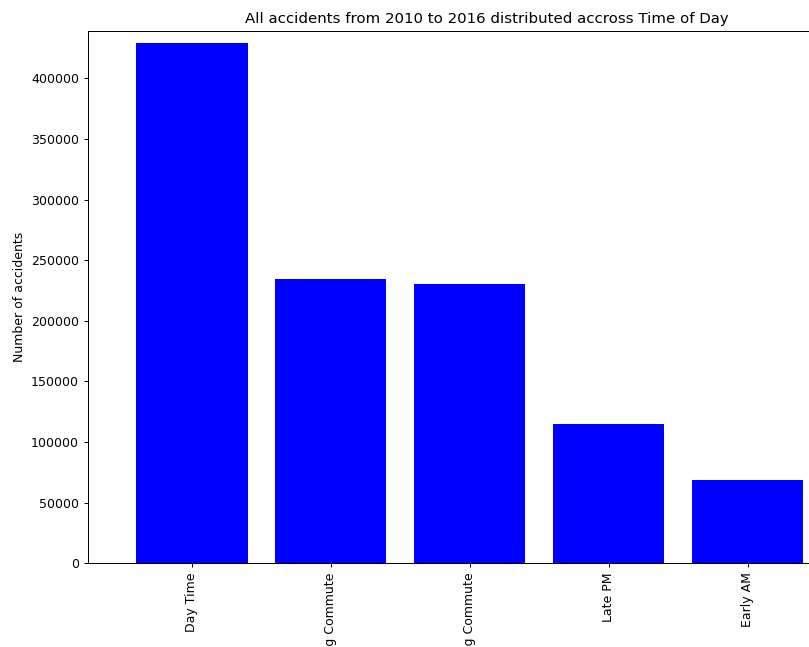

In [63]:
#  Generate a bar plot showing how all accidents from 2010 to 2016 are distributed accross the time of day
Time_of_Day= acc_count_2.index.values
No_of_accidents = acc_count_2.values
x_axis = np.arange(len(No_of_accidents))
# plot the bar chart 
plt.figure(figsize=(10,8))
plt.bar(x_axis, No_of_accidents, color="b", align="center")
# create a variable for Accident_Severity on the x axis and set the rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Time_of_Day, rotation="vertical")
# set the limit of the x axis to position the bars within the chart
plt.xlim(-0.75, len(x_axis))
# set the limit of the y axis to position the top of the bars within the chart
plt.ylim(0, max(acc_count_2)+10000)
# add the titles
plt.title("All accidents from 2010 to 2016 distributed accross Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of accidents")
# Generate a bar plot
plt.tight_layout()
plt.savefig("Images/Accident_distribution_time_of_day")

In [35]:
# Using GroupBy in order to separate the data into fields according to the Year and Time Bin

when_count = df_2.groupby('Year')["Time_Bin"].value_counts()

when_count.head(20)

Year  Time_Bin       
2010  Day Time           58786
      Morning Commute    31436
      Evening Commute    30791
      Late PM            15616
      Early AM            9205
2011  Day Time           58991
      Evening Commute    32074
      Morning Commute    31516
      Late PM            15677
      Early AM            9134
2012  Day Time           56937
      Evening Commute    31022
      Morning Commute    30640
      Late PM            14965
      Early AM            8978
2013  Day Time           56231
      Evening Commute    31212
      Morning Commute    30742
      Late PM            14804
      Early AM            8798
Name: Time_Bin, dtype: int64

In [36]:
# visualise the data on a simple bar chart
when_count.plot(kind="bar")
plt.show()

In [37]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077653 entries, 201001BS70003 to 2016984133416
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   Year        1077653 non-null  int64   
 1   Date        1077653 non-null  object  
 2   Day         1077653 non-null  object  
 3   Time        1077653 non-null  object  
 4   Severity    1077653 non-null  object  
 5   Casualties  1077653 non-null  int64   
 6   Location    1077653 non-null  object  
 7   Gender      1077653 non-null  object  
 8   Time_f      1077653 non-null  int64   
 9   Time_Bin    1077653 non-null  category
dtypes: category(1), int64(3), object(6)
memory usage: 83.2+ MB


In [38]:
# Using GroupBy in order to separate the data into fields according to the Year
grouped_df_2 = df_2.groupby('Year')

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df_2)

# In order to be visualized, a data function must be used...
year_counts = grouped_df_2.size()

year_counts.head(10)

Year
2010    145834
2011    147392
2012    142542
2013    141787
2014    151182
2015    165116
2016    183800
dtype: int64

In [39]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077653 entries, 201001BS70003 to 2016984133416
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   Year        1077653 non-null  int64   
 1   Date        1077653 non-null  object  
 2   Day         1077653 non-null  object  
 3   Time        1077653 non-null  object  
 4   Severity    1077653 non-null  object  
 5   Casualties  1077653 non-null  int64   
 6   Location    1077653 non-null  object  
 7   Gender      1077653 non-null  object  
 8   Time_f      1077653 non-null  int64   
 9   Time_Bin    1077653 non-null  category
dtypes: category(1), int64(3), object(6)
memory usage: 83.2+ MB
